# Experiment data analysis

### Show the Graphs

In [29]:
import pandas as pd
# Read the csv
df = pd.read_csv("exp1_network_growth_data.csv")
df.head(20)
# MELHOR 100 EXECUCOES SAMPLES
# # de RDDS 10 ou ate 20
# Tutorial Visualiçao cientifica
# Segmento de tempo menores (bins)
# Plotar media e Mediana no Boxplot.

,n_sample,n_network,n_rdds,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,3,30,0.716689,164,0.082431,6,0.084636
1,1,2,4,31,0.877630,205,0.088820,16,0.121915
2,1,3,5,32,0.938117,133,0.088663,48,0.058626
3,1,4,6,42,1.074633,205,0.093972,174,0.324162
4,1,5,7,49,1.305310,241,0.106748,0,0.075559
5,1,6,8,61,1.495365,312,0.138300,0,0.123356
6,1,7,9,62,1.720579,286,0.115775,216,3.679045
7,1,8,10,52,1.536141,224,0.103413,0,0.082205
8,2,1,3,17,0.533030,60,0.050995,8,0.035441
9,2,2,4,35,0.757541,108,0.056016,0,0.060836


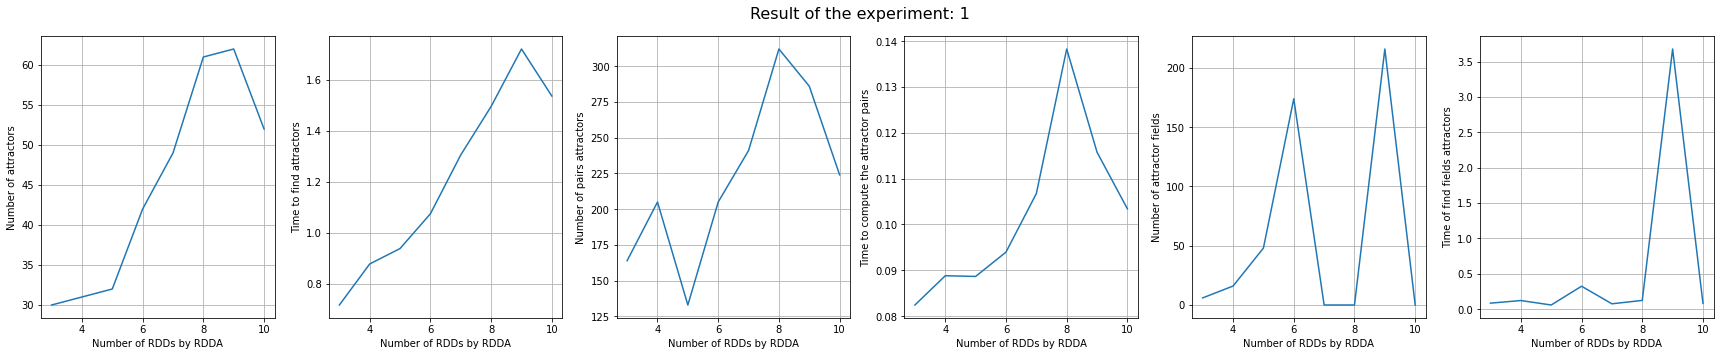

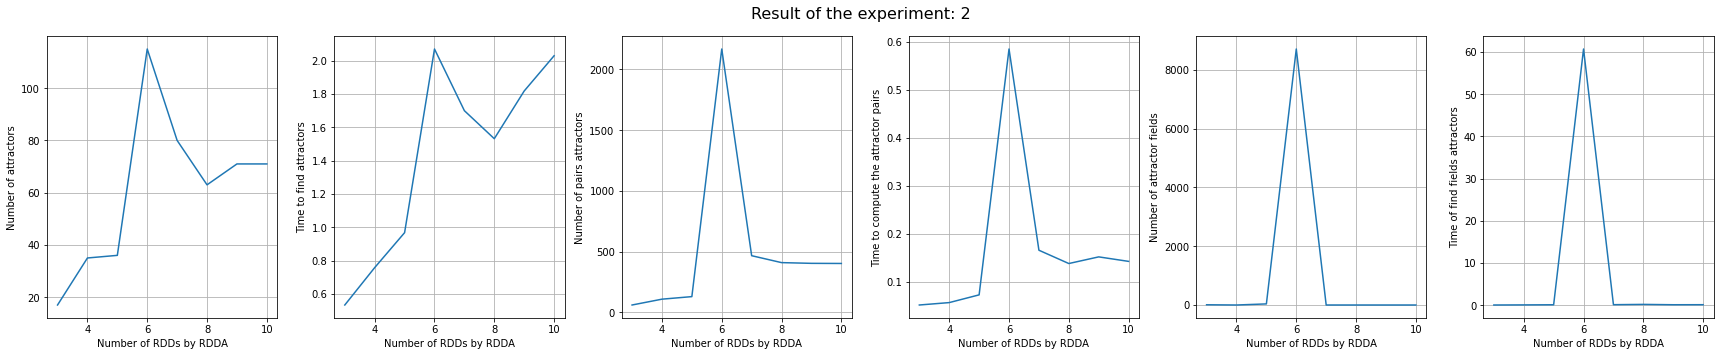

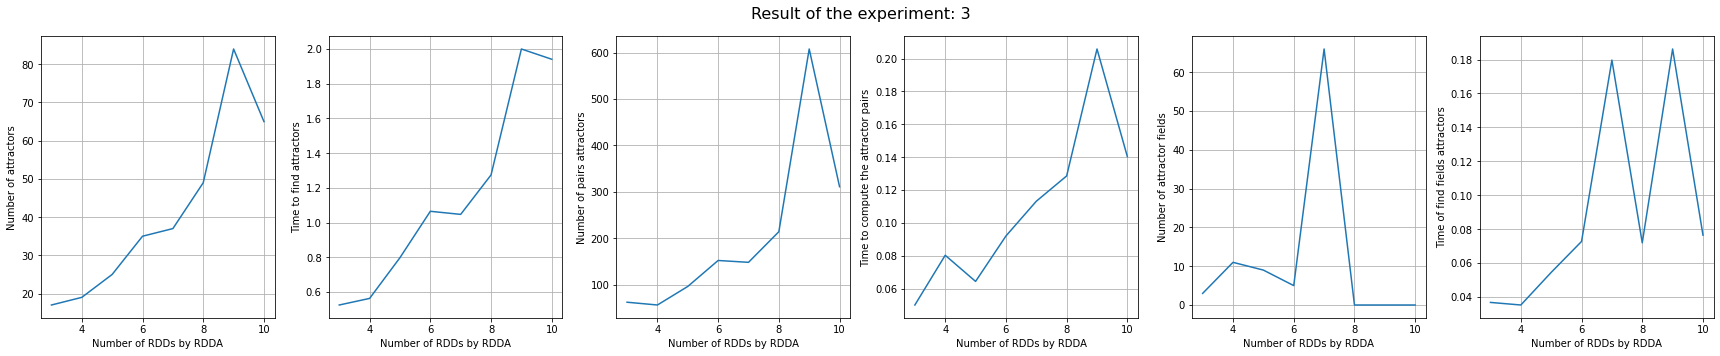

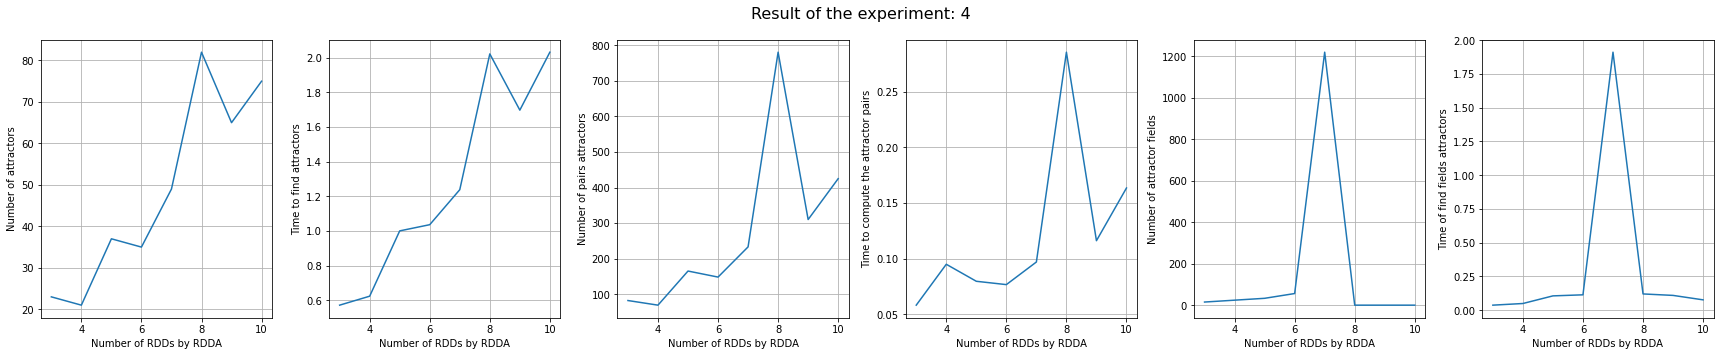

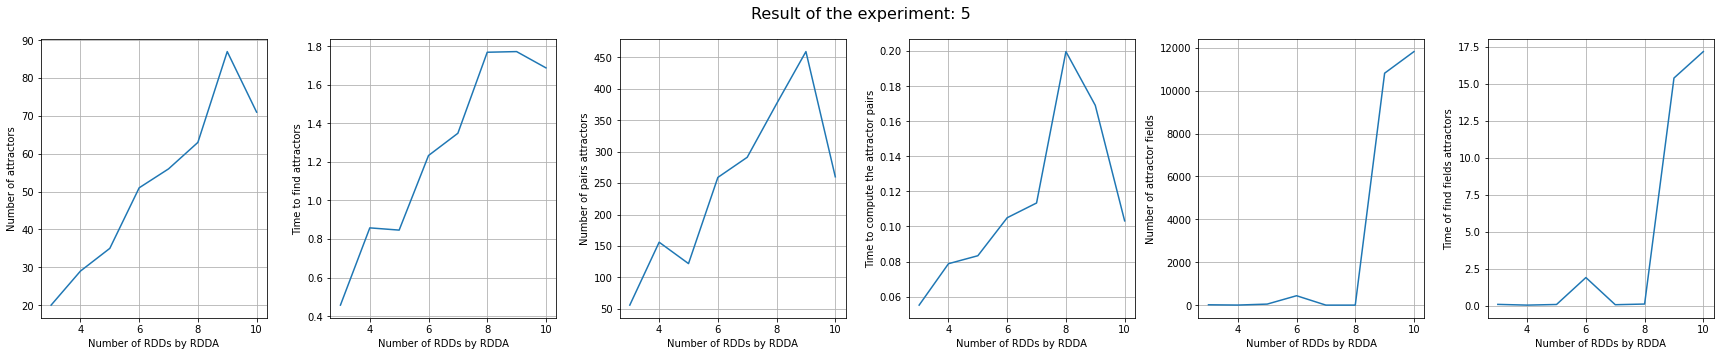

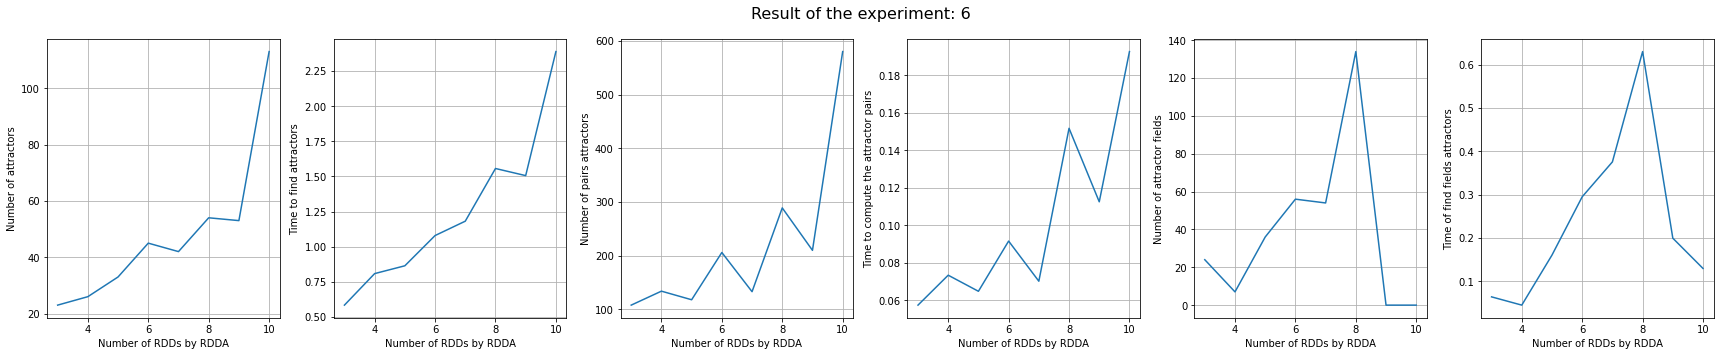

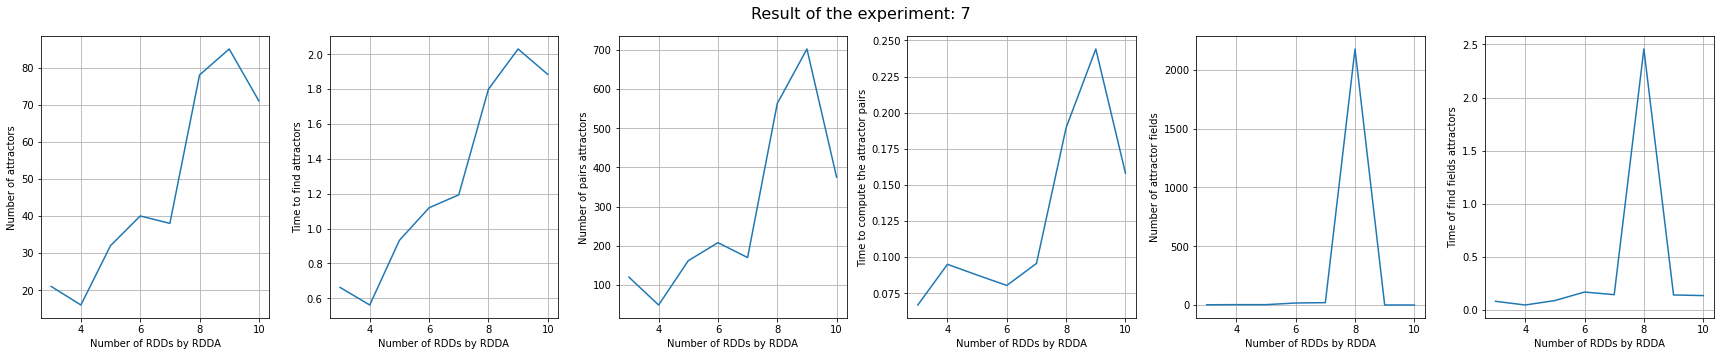

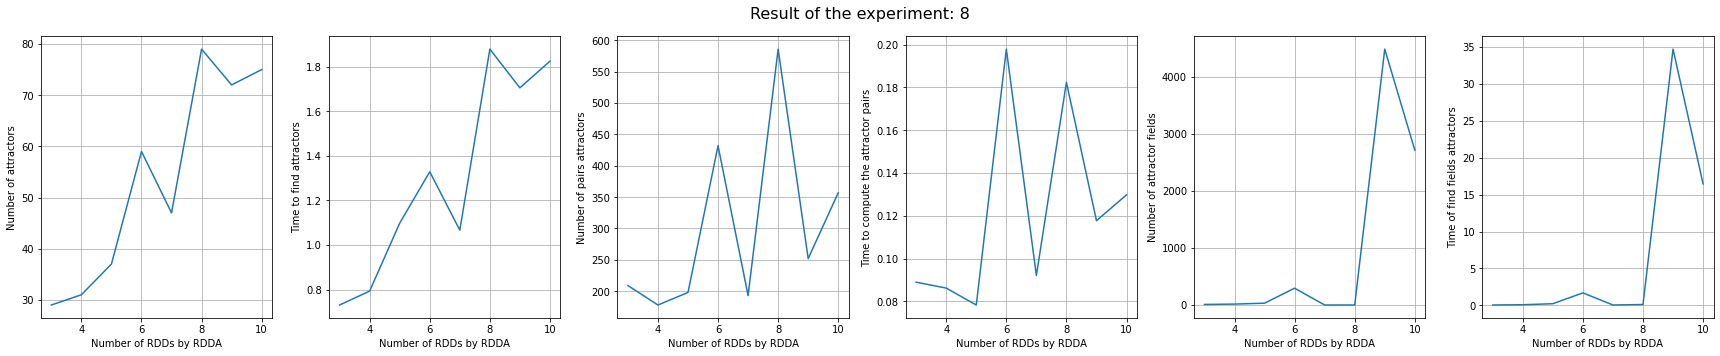

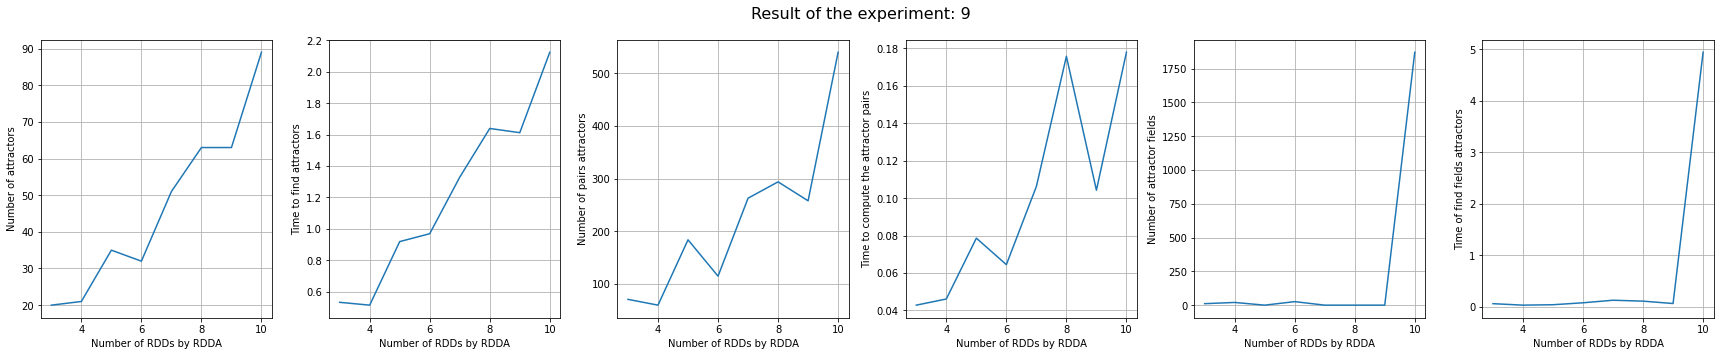

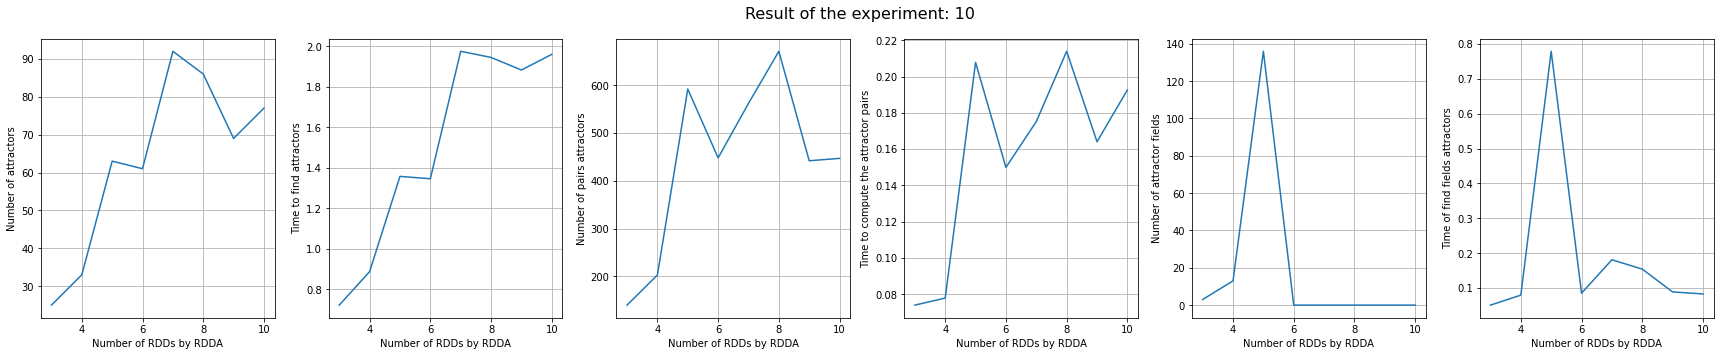

In [3]:
import matplotlib.pyplot as plt
import numpy as np

l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]

dg = df.groupby("n_sample")
for name, group in dg:
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    cont_label = 0
    for (ax, y) in zip(axs, np.asarray(group.keys())[3:]):
        ax.plot(group['n_rdds'], group[y])
        ax.set_xlabel('Number of RDDs by RDDA')
        ax.set_ylabel(l_labels_y[cont_label])
        ax.grid(True)
        cont_label += 1
    fig_.suptitle('Result of the experiment: ' + str(name), fontsize=16)
    fig_.tight_layout()

### Generate Boxplots for every

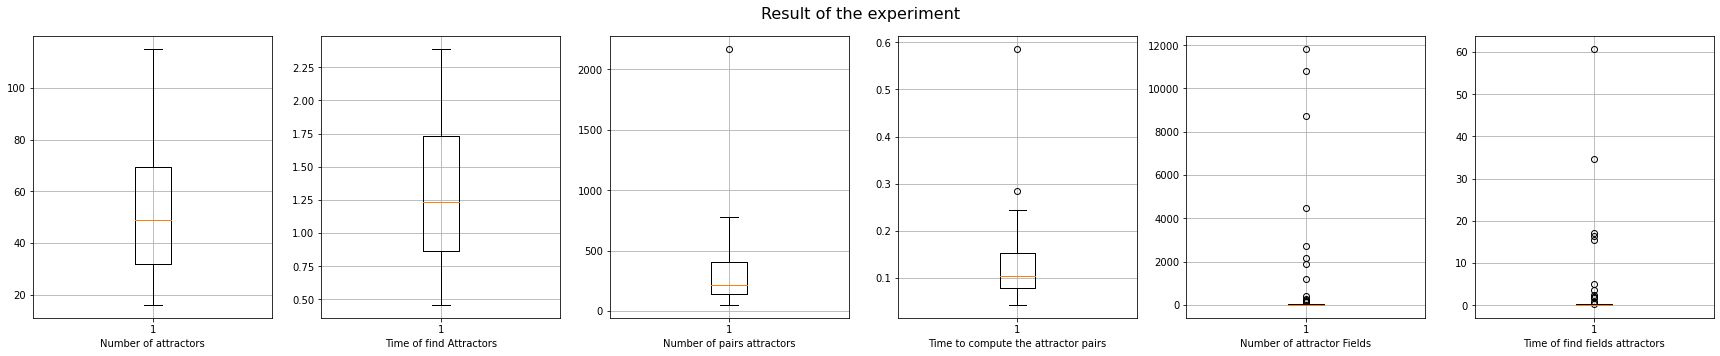

In [4]:
# Generate a Boxplot in group
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,5))
cont_label = 0
for (key,ax) in zip(df.keys()[3:], axs):
    ax.boxplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Result of the experiment', fontsize=16)
fig_.tight_layout()

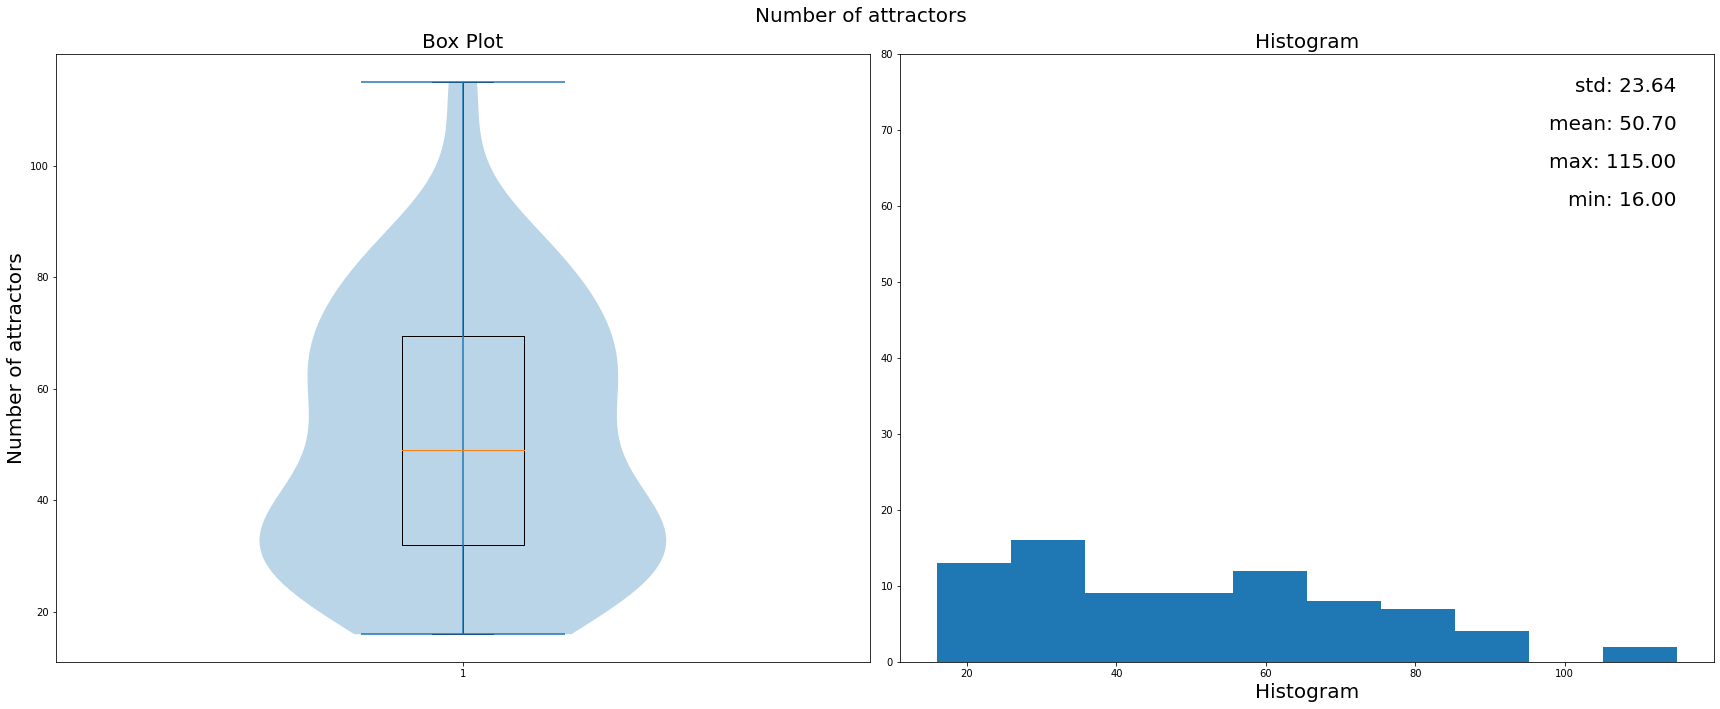

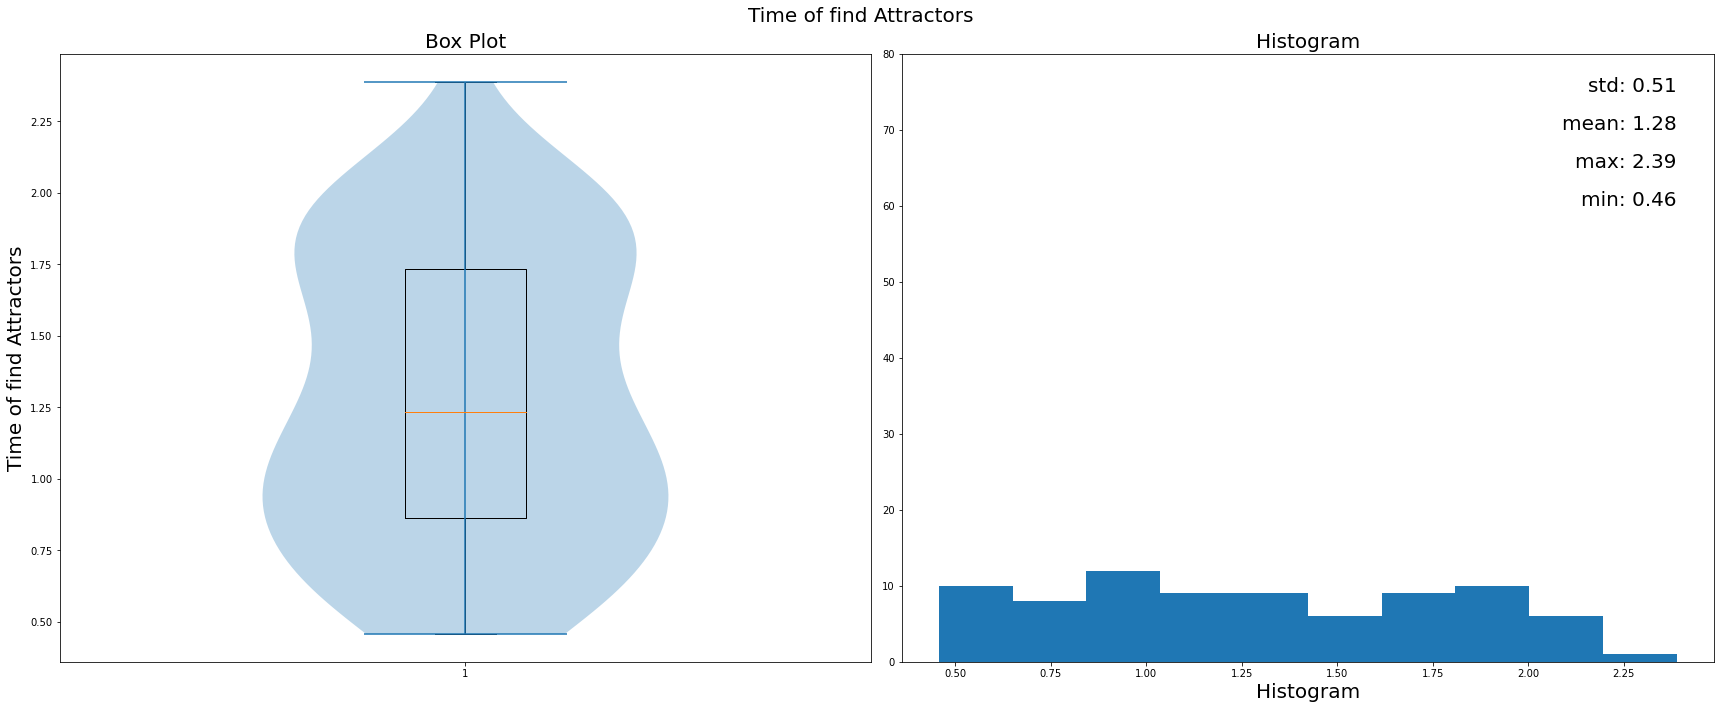

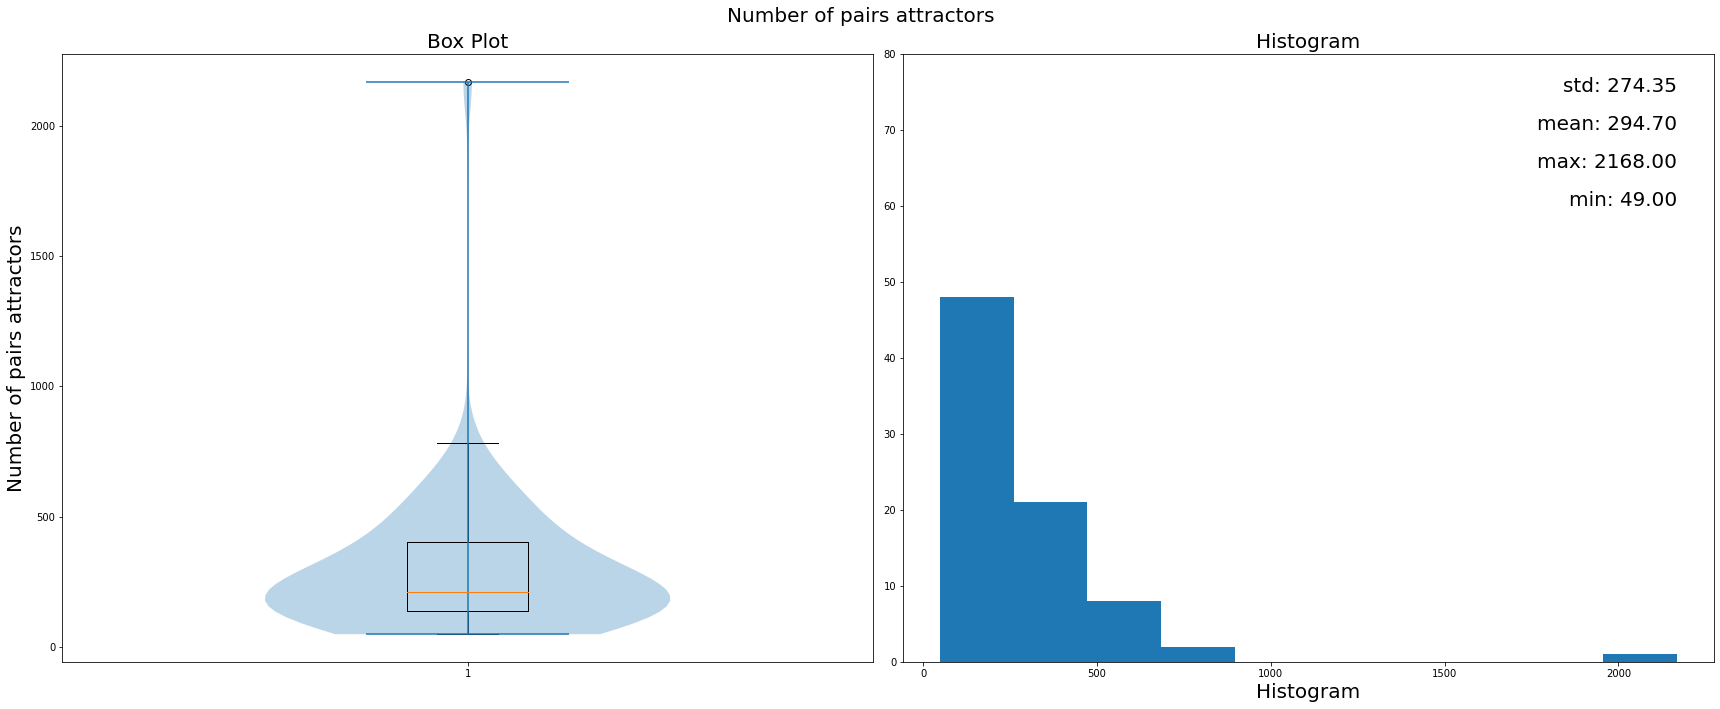

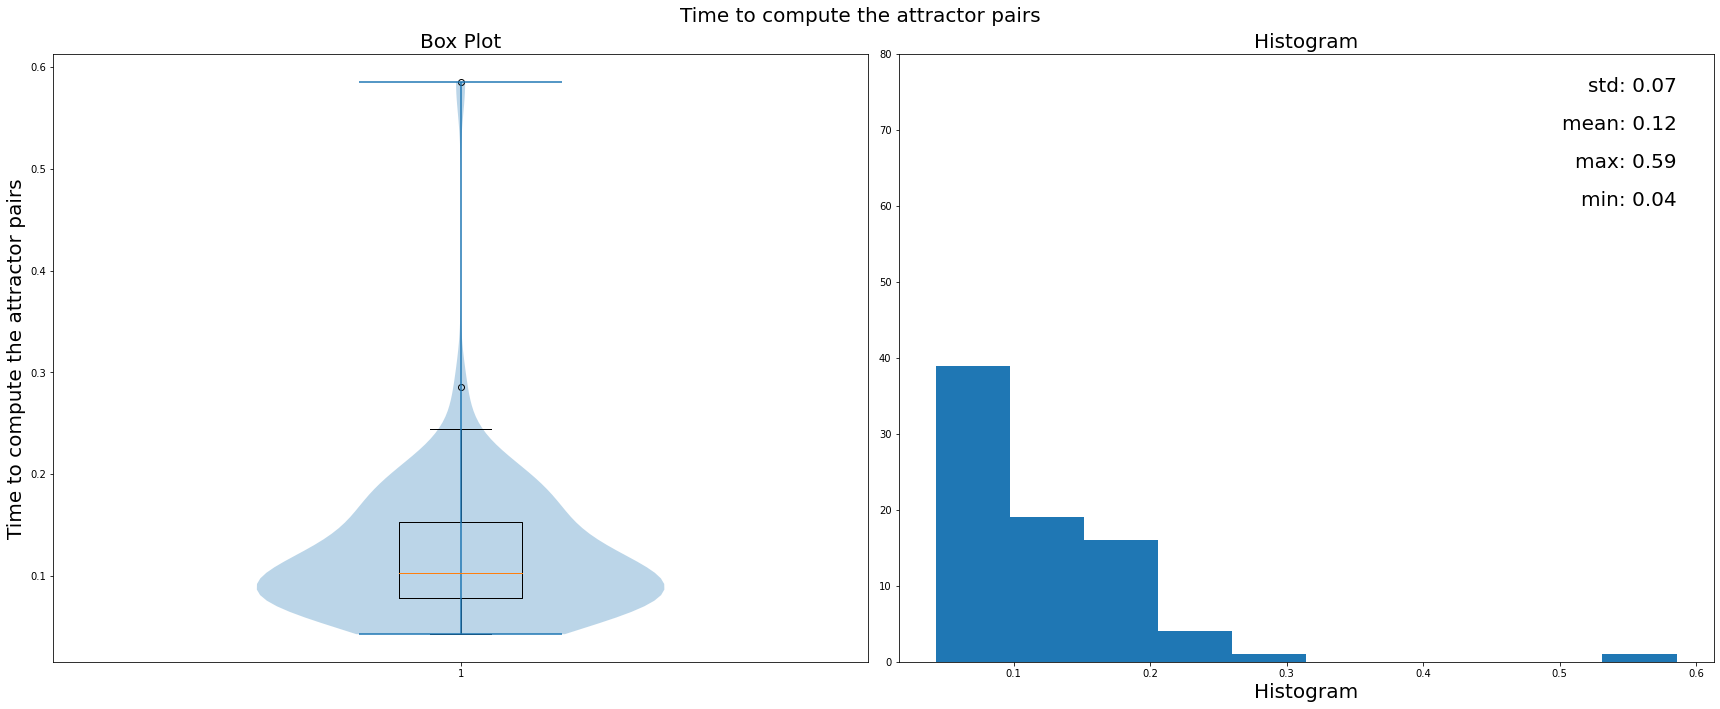

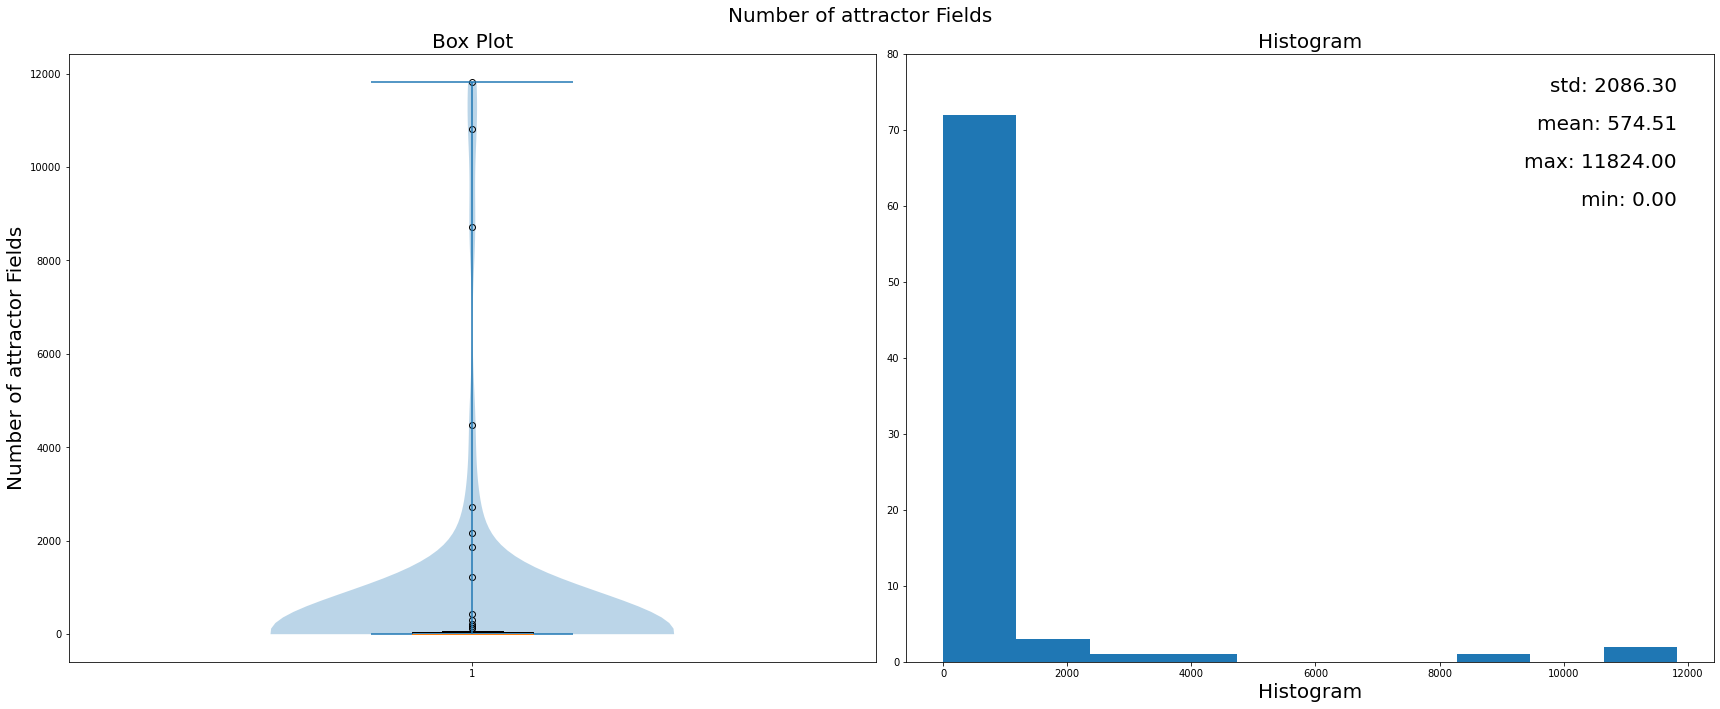

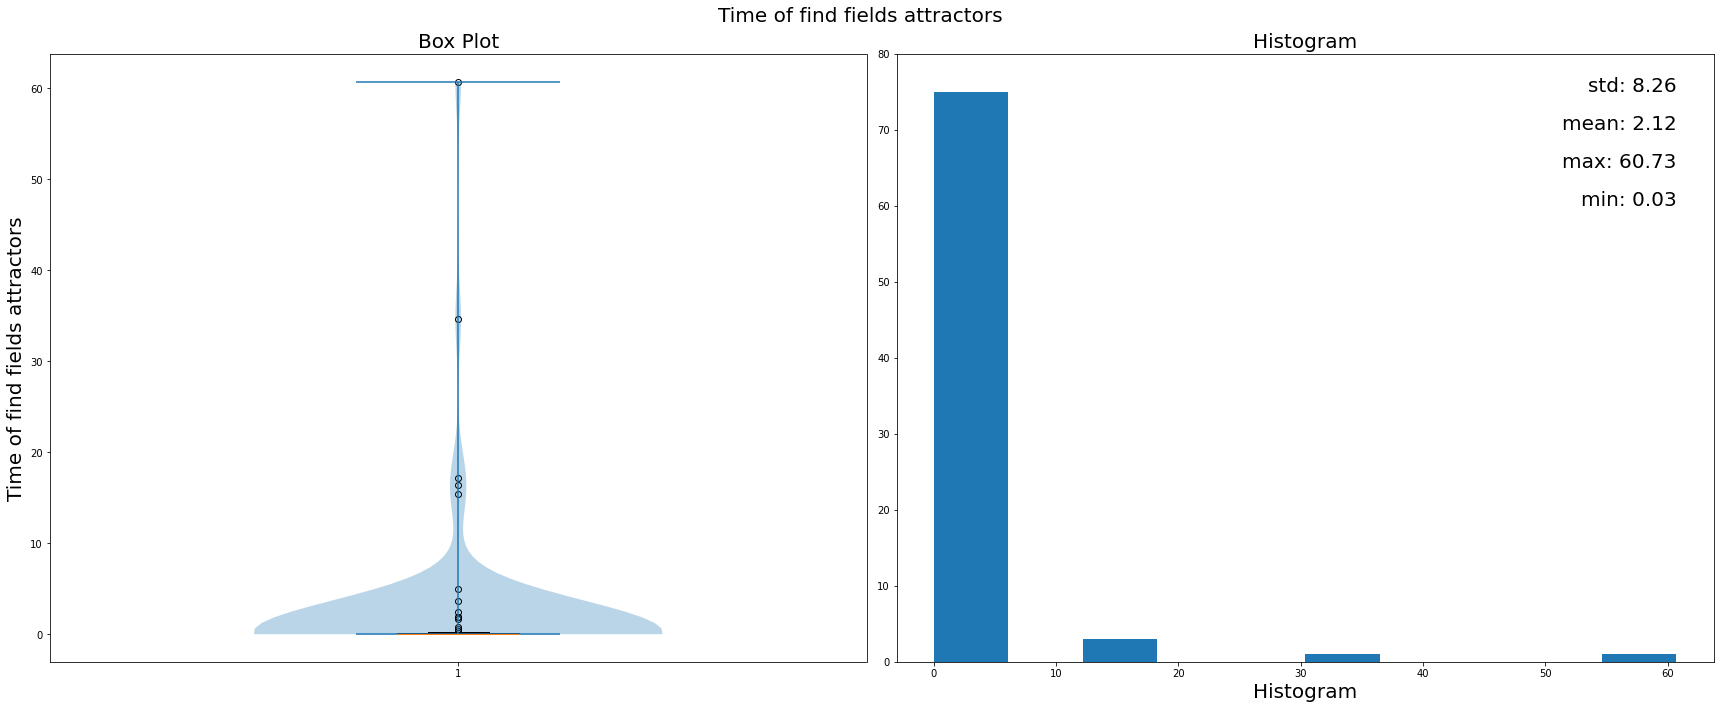

In [28]:
df.keys()
v_label_count = 0
for key in df.keys()[3:]:
    data = df[key]
    # Generating the indicators
    metrics = {'min':data.min(0),'max':data.max(0),'mean':data.mean(),'std':data.std()}

    # for m in metrics:
    #     print(f'{m}: {metrics[m]}')

    # Analysing the number of attractors
    fig, ax = plt.subplots(1,2 ,figsize=(24,10) )
    ax[0].set_title(l_labels_y[v_label_count], fontsize=20)
    ax[0].set_ylabel(l_labels_y[v_label_count], fontsize=20)
    ax[0].boxplot(data)

    ax[0].set_title('Box Plot', fontsize=20) #l_labels_y[v_label_count]
    ax[0].violinplot(data)

    # ax[1].axis('off')
    ax[1].hist(data)
    ax[1].set_ylim([0,80])
    ax[1].set_title('Histogram', fontsize=20)
    ax[1].set_xlabel('Histogram', fontsize=20)


    fig.suptitle(l_labels_y[v_label_count], fontsize=20)
    for y, m in enumerate(metrics):
        #print(y)
        ax[1].text(data.max(),(y/len(metrics)/4+3/len(metrics))*80,f'{m}: {metrics[m]:.2f}',ha='right', fontsize=20)
        #ax[1].
    v_label_count += 1
    fig.tight_layout()